In [10]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions  #導入繪圖套件
import matplotlib.pyplot as plt                     #導入繪圖套件
from matplotlib.colors import ListedColormap         #導入繪圖套件(顏色)
import numpy as np                                   #導入矩陣套件
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [11]:
with open("x_train.csv", newline='', encoding='utf-8') as csvfile:             #匯入訓練資料(特徵值)
    lis = list(csv.reader(csvfile))

lis[0][0]=lis[0][0].replace("\ufeff","")

x_train=[]
for x in lis:
    stap=[]
    for y in x:
        stap+=[float(y)]
    x_train+=[stap]
    
x_train=np.array(x_train)

with open("y_train.csv", newline='', encoding='utf-8') as csvfile:          #匯入訓練資料(LABEL值)
    lis = list(csv.reader(csvfile))

lis[0][0]=lis[0][0].replace("\ufeff","")

y_train=[]
for x in lis:    
    for y in x:
        y_train+=[int(y)]

y_train=np.array(y_train)

In [12]:
with open("x_text.csv", newline='', encoding='utf-8') as csvfile:             #匯入測試資料(特徵值)
    lis = list(csv.reader(csvfile))

lis[0][0]=lis[0][0].replace("\ufeff","")

x_text=[]
for x in lis:
    stap=[]
    for y in x:
        stap+=[float(y)]
    x_text+=[stap]
    
x_text=np.array(x_text)

with open("y_text.csv", newline='', encoding='utf-8') as csvfile:          #匯入測試資料(LABEL值)
    lis = list(csv.reader(csvfile))

lis[0][0]=lis[0][0].replace("\ufeff","")

y_text=[]
for x in lis:    
    for y in x:
        y_text+=[int(y)]

y_text=np.array(y_text)

0.8915094339622641
0.8152173913043478


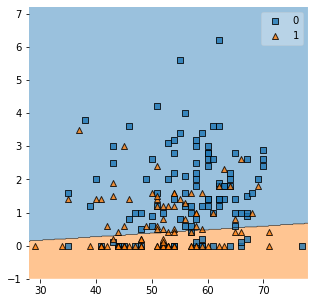

In [13]:
val={}
for x in range(2,len(x_train[0])):
    val[x]=np.mean(x_train[:,x])
width=100

svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(x_train,y_train)                                    #開始訓練wd

plot_decision_regions(                                           #建立繪圖樣式
    x_train,
    y_train,
    clf=svm,
    filler_feature_values=val,
    filler_feature_ranges={2: width, 3:width, 4:width,5: width, 6:width, 7:width,8: width, 9:width, 10:width, 11:width, 12:width}
    )
print(svm.score(x_train,y_train))
print(svm.score(x_text,y_text))
plt.show()   #顯示繪圖

混亂矩陣
[[17  9]
 [ 8 58]]
Accuracy: 0.815
Precision: 0.866
Recall: 0.879
F1: 0.872


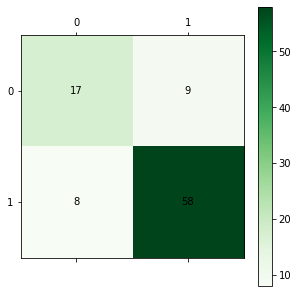

In [14]:
y_pred=svm.predict(x_text)
con=confusion_matrix(y_true=y_text,y_pred=y_pred)


print("混亂矩陣")
print(con)
print('Accuracy: %.3f' %accuracy_score(y_true=y_text,y_pred=y_pred))
print('Precision: %.3f' %precision_score(y_true=y_text,y_pred=y_pred))
print('Recall: %.3f' %recall_score(y_true=y_text,y_pred=y_pred))
print('F1: %.3f' %f1_score(y_true=y_text,y_pred=y_pred))


plt.rc('figure',figsize=(5,5))
 
plt.matshow(con,cmap = plt.cm.Greens) # 背景颜色
plt.colorbar() # 颜色標籤
 
# 内部添加圖例標籤
for x in range(len(con)):
    for y in range(len(con)):
        plt.annotate(con[y,x], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')

plt.show()
